In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Liste des tickers ou indices avec leurs noms de fichiers associés
tickers_files = {
    "Gold": r"Data\Data monthly\Bloomberg Gold - Données Historiques.csv",
    "Natural Gas": r"Data\Data monthly\Bloomberg Natural Gas - Données Historiques.csv",
    "WTI Crude Oil": r"Data\Data monthly\Bloomberg WTI Crude Oil - Données Historiques.csv",
    "Silver": r"Data\Data monthly\Bloomberg Silver - Données Historiques.csv",
    "Lean Hogs": r"Data\Data monthly\Bloomberg Lean Hogs - Données Historiques.csv",
    "Cotton": r"Data\Data monthly\Bloomberg Cotton - Données Historiques.csv",
    "Coffee": r"Data\Data monthly\Bloomberg Coffee - Données Historiques.csv",
    "Sugar": r"Data\Data monthly\Bloomberg Sugar - Données Historiques.csv",
    "Wheat": r"Data\Data monthly\Bloomberg Wheat - Données Historiques.csv",
    "Soybeans": r"Data\Data monthly\Bloomberg Soybeans - Données Historiques.csv",
    "Corn": r"Data\Data monthly\Bloomberg Corn - Données Historiques.csv",
    "Copper": r"Data\Data monthly\Bloomberg Copper - Données Historiques.csv",
    "Aluminum": r"Data\Data monthly\Bloomberg Aluminum - Données Historiques.csv"
}

# Dictionnaire pour stocker les DataFrames
dataframes = {}

# Importer chaque fichier et le stocker dans un DataFrame
for ticker, file in tickers_files.items():
    df = pd.read_csv(file)
    dataframes[ticker] = df

# Afficher les premiers enregistrements de chaque DataFrame pour vérifier
for ticker, df in dataframes.items():
    print(f"DataFrame pour {ticker}:")
    print(df.head())
    print("\n")

DataFrame pour Gold:
         Date Dernier    Ouv.  Plus Haut Plus Bas   Vol. Variation %
0  01/04/2025  288,53  297,40     297,94   278,45    NaN      -2,25%
1  01/03/2025  295,18  272,30     296,17   271,41    NaN       9,54%
2  01/02/2025  269,47  265,97     281,31   265,47    NaN       0,48%
3  01/01/2025  268,19  252,94     270,79   250,84  0,02K       6,27%
4  01/12/2024  252,36  253,10     263,66   248,54  0,02K      -1,49%


DataFrame pour Natural Gas:
         Date  Dernier     Ouv.  Plus Haut Plus Bas   Vol. Variation %
0  01/04/2025  50,2364  54,3615    55,2688  44,1683    NaN      -7,25%
1  01/03/2025  54,1643  50,2850    62,1068  49,0753    NaN       5,72%
2  01/02/2025  51,2318  44,6084    57,5438  42,5508    NaN      25,15%
3  01/01/2025  40,9370  41,5287    50,3912  39,5114  0,02K      -1,74%
4  01/12/2024  41,6632  36,0855    45,2674  33,5821  0,02K       9,86%


DataFrame pour WTI Crude Oil:
         Date  Dernier     Ouv.  Plus Haut Plus Bas   Vol. Variation %
0  01/

In [20]:
for ticker, df in dataframes.items():
    df = df.rename(columns={"Dernier": "Prix", "Variation %": "Rendements"})
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.sort_values('Date').reset_index()

    df["Prix"] = df["Prix"].str.replace(",", ".")
    df["Prix"] = pd.to_numeric(df["Prix"], errors='coerce')

    df["Rendements"] = df["Rendements"].str.replace(",", ".").str.rstrip("%")
    df["Rendements"] = pd.to_numeric(df["Rendements"], errors='coerce') / 100

    df = df[["Date", "Prix", "Rendements"]]

    dataframes[ticker] = df

    print(f"--- {ticker} ---")
    print(df.head())

--- Gold ---
        Date   Prix  Rendements
0 2000-01-01  51.38     -0.0191
1 2000-01-02  52.82      0.0280
2 2000-01-03  50.06     -0.0523
3 2000-01-04  48.87     -0.0238
4 2000-01-05  48.40     -0.0096
--- Natural Gas ---
        Date    Prix  Rendements
0 2000-01-01  53.848      0.1435
1 2000-01-02  56.784      0.0545
2 2000-01-03  60.349      0.0628
3 2000-01-04  64.008      0.0606
4 2000-01-05  88.289      0.3793
--- WTI Crude Oil ---
        Date     Prix  Rendements
0 2000-01-01  139.776      0.1150
1 2000-01-02  156.286      0.1181
2 2000-01-03  145.723     -0.0676
3 2000-01-04  142.943     -0.0191
4 2000-01-05  162.746      0.1385
--- Silver ---
        Date   Prix  Rendements
0 2000-01-01  84.23     -0.0249
1 2000-01-02  80.73     -0.0416
2 2000-01-03  79.73     -0.0124
3 2000-01-04  78.61     -0.0140
4 2000-01-05  77.83     -0.0099
--- Lean Hogs ---
        Date    Prix  Rendements
0 2000-01-01  49.297      0.0609
1 2000-01-02  47.518     -0.0361
2 2000-01-03  51.837      0

In [21]:
momentum = {}
for ticker, df in dataframes.items():
    momentum_series = df['Rendements'].rolling(window=6).sum()

    momentum_df = pd.DataFrame({
        'Date': df['Date'],
        'Momentum': momentum_series
    })

    momentum[ticker] = momentum_df

    print(f"--- {ticker} ---")
    print(momentum_df.head())

--- Gold ---
        Date  Momentum
0 2000-01-01       NaN
1 2000-01-02       NaN
2 2000-01-03       NaN
3 2000-01-04       NaN
4 2000-01-05       NaN
--- Natural Gas ---
        Date  Momentum
0 2000-01-01       NaN
1 2000-01-02       NaN
2 2000-01-03       NaN
3 2000-01-04       NaN
4 2000-01-05       NaN
--- WTI Crude Oil ---
        Date  Momentum
0 2000-01-01       NaN
1 2000-01-02       NaN
2 2000-01-03       NaN
3 2000-01-04       NaN
4 2000-01-05       NaN
--- Silver ---
        Date  Momentum
0 2000-01-01       NaN
1 2000-01-02       NaN
2 2000-01-03       NaN
3 2000-01-04       NaN
4 2000-01-05       NaN
--- Lean Hogs ---
        Date  Momentum
0 2000-01-01       NaN
1 2000-01-02       NaN
2 2000-01-03       NaN
3 2000-01-04       NaN
4 2000-01-05       NaN
--- Cotton ---
        Date  Momentum
0 2000-01-01       NaN
1 2000-01-02       NaN
2 2000-01-03       NaN
3 2000-01-04       NaN
4 2000-01-05       NaN
--- Coffee ---
        Date  Momentum
0 2000-01-01       NaN
1 2000-0

In [22]:
# 1. Fusionner tous les momentums dans un seul DataFrame long format
momentum_long = []

for ticker, df in momentum.items():
    temp = df.copy()
    temp["Ticker"] = ticker
    momentum_long.append(temp)

momentum_all = pd.concat(momentum_long, ignore_index=True)

In [23]:
# 3. Initialiser les positions et performances
positions = {}
strategy_perf = []
nrb_actif = 5

for date in momentum_all["Date"]:
    daily_mom = momentum_all[momentum_all["Date"] == date].dropna()
    
    if len(daily_mom) < nrb_actif * 2:
        # On ne peut pas faire long/short sur nbr_actifs actifs si < nrb_actif*2 disponibles
        continue

    top = daily_mom.sort_values("Momentum", ascending=False).head(nrb_actif)
    bottom = daily_mom.sort_values("Momentum", ascending=True).head(nrb_actif)

    # Dictionnaire des positions : 1 pour long, -1 pour short
    daily_pos = {ticker: 0 for ticker in dataframes.keys()}
    for t in top["Ticker"]:
        daily_pos[t] = 1
    for t in bottom["Ticker"]:
        daily_pos[t] = -1

    positions[date] = daily_pos

    # 4. Calcul du rendement de la stratégie pour ce mois
    returns = []
    for ticker, pos in daily_pos.items():
        df = dataframes[ticker]
        rendement = df[df["Date"] == date]["Rendements"]
        if not rendement.empty and not np.isnan(rendement.values[0]):
            returns.append(pos * rendement.values[0])

    if returns:
        strategy_perf.append({"Date": date, "Rendement": np.mean(returns)})

In [24]:
# 5. Créer DataFrame de performance
perf_df = pd.DataFrame(strategy_perf)
perf_df = perf_df.sort_values("Date")
perf_df["Cumulé"] = (1 + perf_df["Rendement"]/100).cumprod()

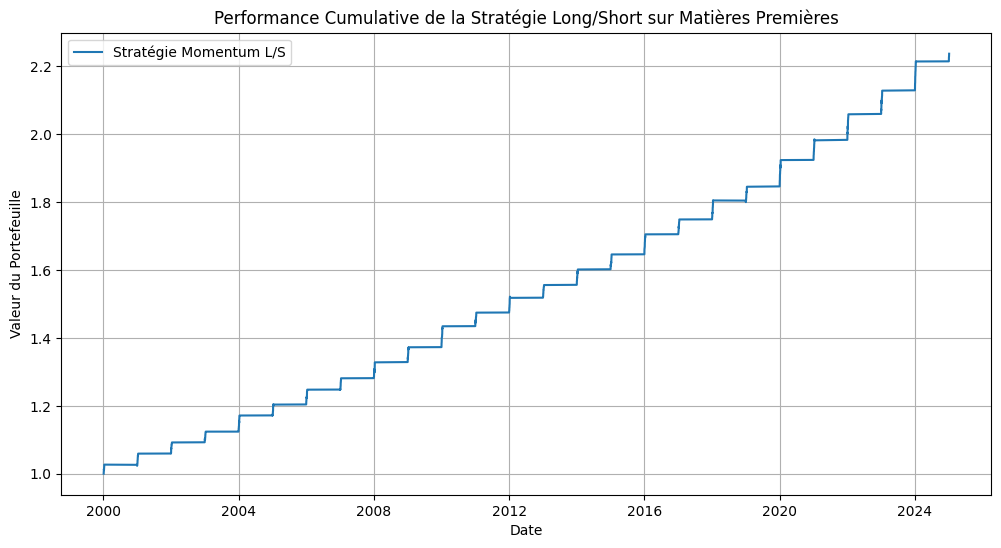

In [25]:
# 6. Plot

plt.figure(figsize=(12,6))
plt.plot(perf_df["Date"], perf_df["Cumulé"], label="Stratégie Momentum L/S")
plt.title("Performance Cumulative de la Stratégie Long/Short sur Matières Premières")
plt.xlabel("Date")
plt.ylabel("Valeur du Portefeuille")
plt.grid(True)
plt.legend()
plt.show()

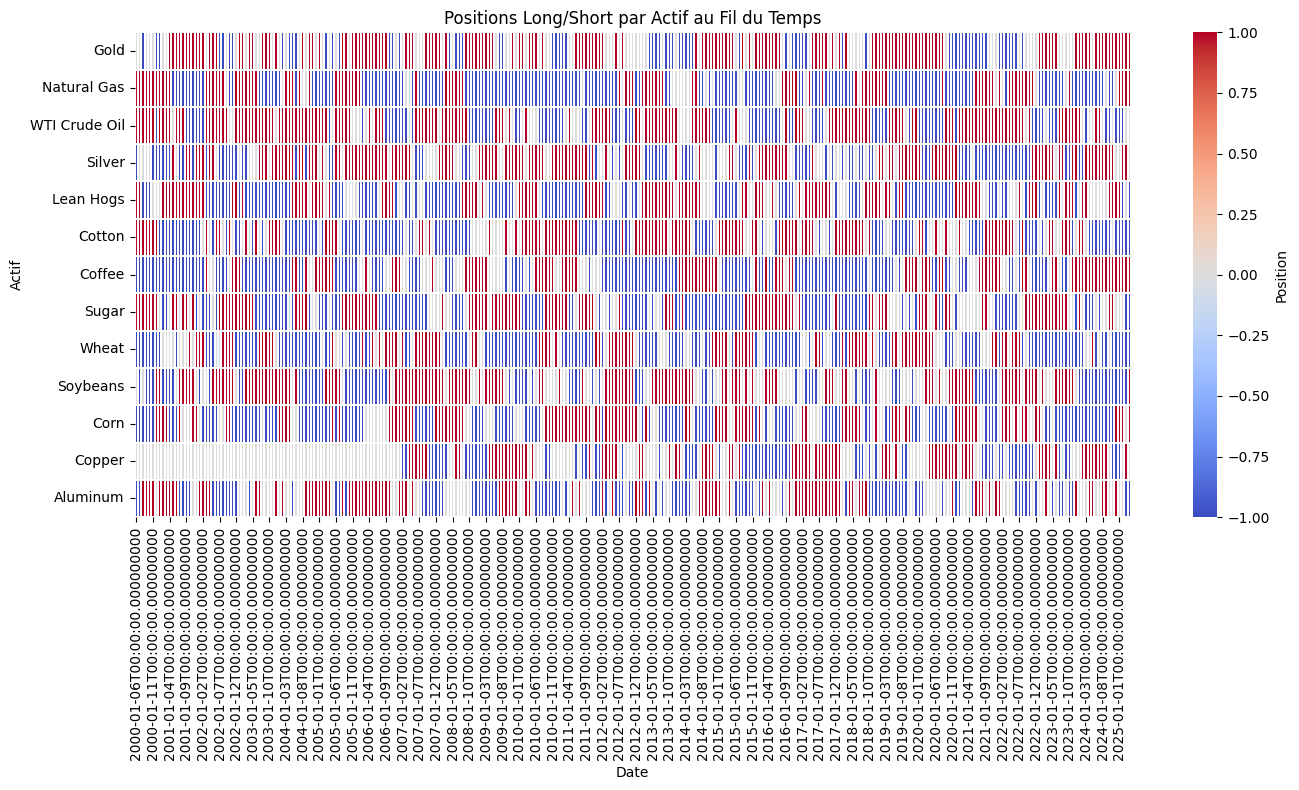

In [26]:
# 1. Convertir le dictionnaire des positions en DataFrame
import seaborn as sns

positions_df = pd.DataFrame.from_dict(positions, orient='index')
positions_df.index = pd.to_datetime(positions_df.index)
positions_df = positions_df.sort_index()

# 2. Transposer pour avoir tickers en lignes, dates en colonnes (si tu veux une autre orientation, inverse)
positions_df_t = positions_df.T

# 3. Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(positions_df_t, cmap="coolwarm", center=0, linewidths=0.1, cbar_kws={'label': 'Position'})
plt.title("Positions Long/Short par Actif au Fil du Temps")
plt.xlabel("Date")
plt.ylabel("Actif")
plt.tight_layout()
plt.show()


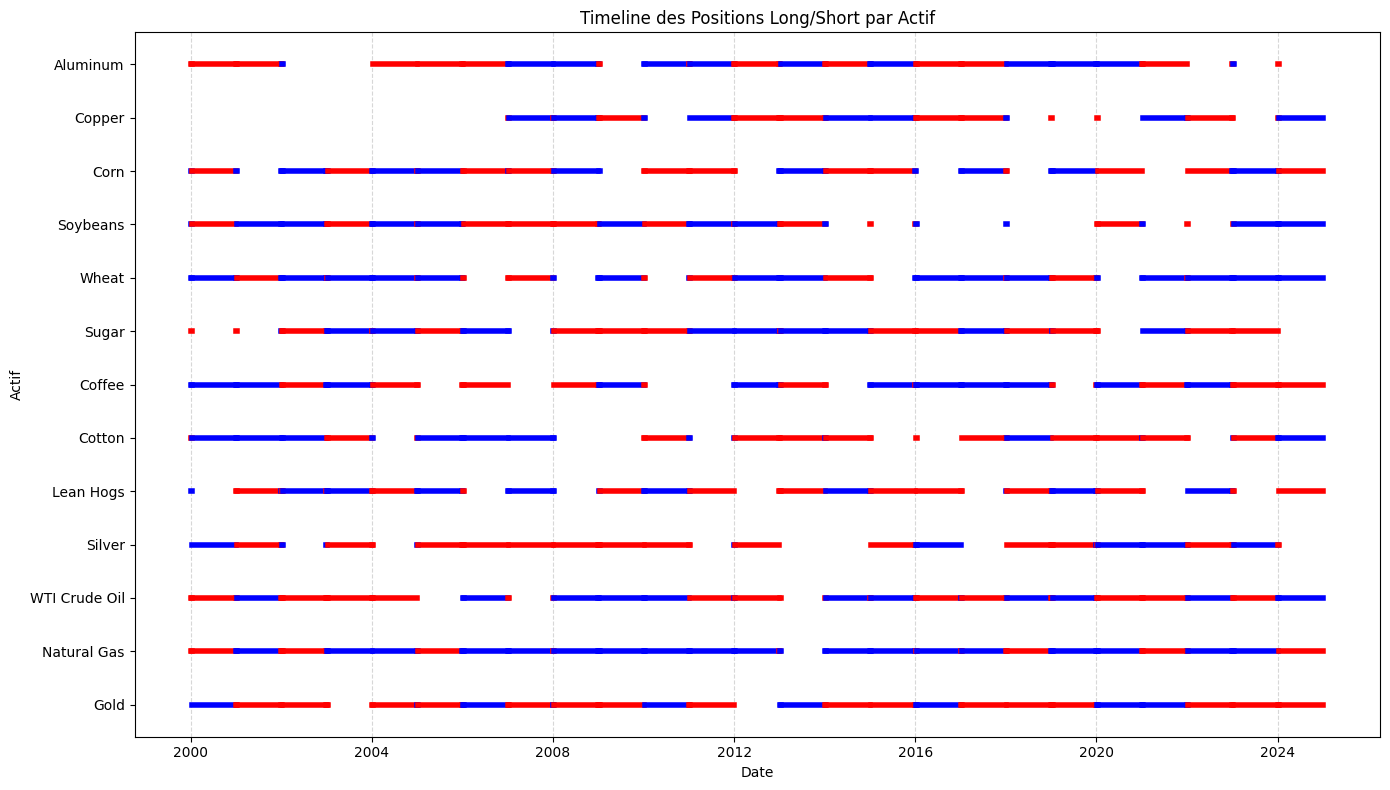

In [27]:
fig, ax = plt.subplots(figsize=(14, 8))

for i, ticker in enumerate(positions_df_t.index):
    pos_series = positions_df_t.loc[ticker]
    dates = pos_series.index

    # Couleurs : long (rouge), short (bleu)
    for j in range(1, len(dates)):
        val = pos_series.iloc[j]
        if val == 1:
            ax.plot(dates[j-1:j+1], [i, i], color='red', linewidth=4)
        elif val == -1:
            ax.plot(dates[j-1:j+1], [i, i], color='blue', linewidth=4)

ax.set_yticks(range(len(positions_df_t.index)))
ax.set_yticklabels(positions_df_t.index)
ax.set_title("Timeline des Positions Long/Short par Actif")
ax.set_xlabel("Date")
ax.set_ylabel("Actif")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [86]:
nb_years = (perf_df["Date"].iloc[-1] - perf_df["Date"].iloc[0]).days / 365
rendement_annuel = perf_df["Cumulé"].iloc[-1] ** (1 / nb_years) - 1
print(f"Rendement annualisé : {rendement_annuel:.2%}")
perf_df

Rendement annualisé : 4.58%


,Date,Rendement,Cumulé
0,2000-01-03,0.001967,1.000020
1208,2000-01-03,0.001967,1.000039
1812,2000-01-03,0.001967,1.000059
2114,2000-01-03,0.001967,1.000079
906,2000-01-03,0.001967,1.000098
...,...,...,...
603,2025-01-04,0.012462,3.068225
3019,2025-01-04,0.012462,3.068607
301,2025-01-04,0.012462,3.068989
1509,2025-01-04,0.012462,3.069372
